In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

pip install citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL

api_key = '55fd9f09c162a589ee26dc37ca266b12'
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    #print(city)
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #response = requests.get(query_url + city).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather  = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat      = city_weather['coord']['lat']
        city_lng      = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds   = city_weather['clouds']['all']
        city_wind     = city_weather['wind']['speed']
        city_country  = city_weather['sys']['country']
        city_date     = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
        #print(city_data)

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | narvik
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | wailua homesteads
Processing Record 11 of Set 1 | korem
Processing Record 12 of Set 1 | margaret river
Processing Record 13 of Set 1 | fort bragg
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | san antonio de pale
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | qibray
Processing Record 18 of Set 1 | mao
Processing Record 19 of Set 1 | palmer
Processing Record 20 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 21 of Set 1 | 

Processing Record 40 of Set 4 | tonghae
Processing Record 41 of Set 4 | jamestown
Processing Record 42 of Set 4 | hermanus
Processing Record 43 of Set 4 | gebeit
Processing Record 44 of Set 4 | naryn
Processing Record 45 of Set 4 | island harbour
Processing Record 46 of Set 4 | hadibu
Processing Record 47 of Set 4 | rio grande
Processing Record 48 of Set 4 | yuncheng
Processing Record 49 of Set 4 | laojunmiao
Processing Record 0 of Set 5 | holualoa
Processing Record 1 of Set 5 | buka
Processing Record 2 of Set 5 | rezekne
Processing Record 3 of Set 5 | main beach
Processing Record 4 of Set 5 | khovd
Processing Record 5 of Set 5 | tolanaro
Processing Record 6 of Set 5 | fukuecho
Processing Record 7 of Set 5 | brigantine
Processing Record 8 of Set 5 | kayangel
Processing Record 9 of Set 5 | malango
Processing Record 10 of Set 5 | labrador city
Processing Record 11 of Set 5 | tinajo
Processing Record 12 of Set 5 | rio preto da eva
Processing Record 13 of Set 5 | geraldton
Processing Recor

City not found. Skipping...
Processing Record 33 of Set 8 | kuta
Processing Record 34 of Set 8 | yanam
Processing Record 35 of Set 8 | taulaga
Processing Record 36 of Set 8 | oriximina
Processing Record 37 of Set 8 | taltal
Processing Record 38 of Set 8 | guerrero negro
Processing Record 39 of Set 8 | chiang klang
Processing Record 40 of Set 8 | beau vallon
Processing Record 41 of Set 8 | bataipora
Processing Record 42 of Set 8 | newport
Processing Record 43 of Set 8 | puerto san carlos
City not found. Skipping...
Processing Record 44 of Set 8 | porto san giorgio
Processing Record 45 of Set 8 | sisimiut
Processing Record 46 of Set 8 | guanajuato
Processing Record 47 of Set 8 | dakoro
Processing Record 48 of Set 8 | bratsk
Processing Record 49 of Set 8 | zubova polyana
Processing Record 0 of Set 9 | thompson
Processing Record 1 of Set 9 | mermoz boabab
Processing Record 2 of Set 9 | 'ohonua
City not found. Skipping...
Processing Record 3 of Set 9 | kumi
Processing Record 4 of Set 9 | in

In [47]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [48]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hawaiian paradise park,19.5933,-154.9731,23.83,98,100,2.57,US,1698319429
1,sechura,-5.5569,-80.8222,20.42,82,99,5.14,PE,1698319789
2,ariquemes,-9.9133,-63.0408,26.52,72,12,0.64,BR,1698319767
3,thompson,55.7435,-97.8558,-3.91,80,100,2.57,CA,1698319419
4,grytviken,-54.2811,-36.5092,2.48,97,99,6.90,GS,1698319791


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


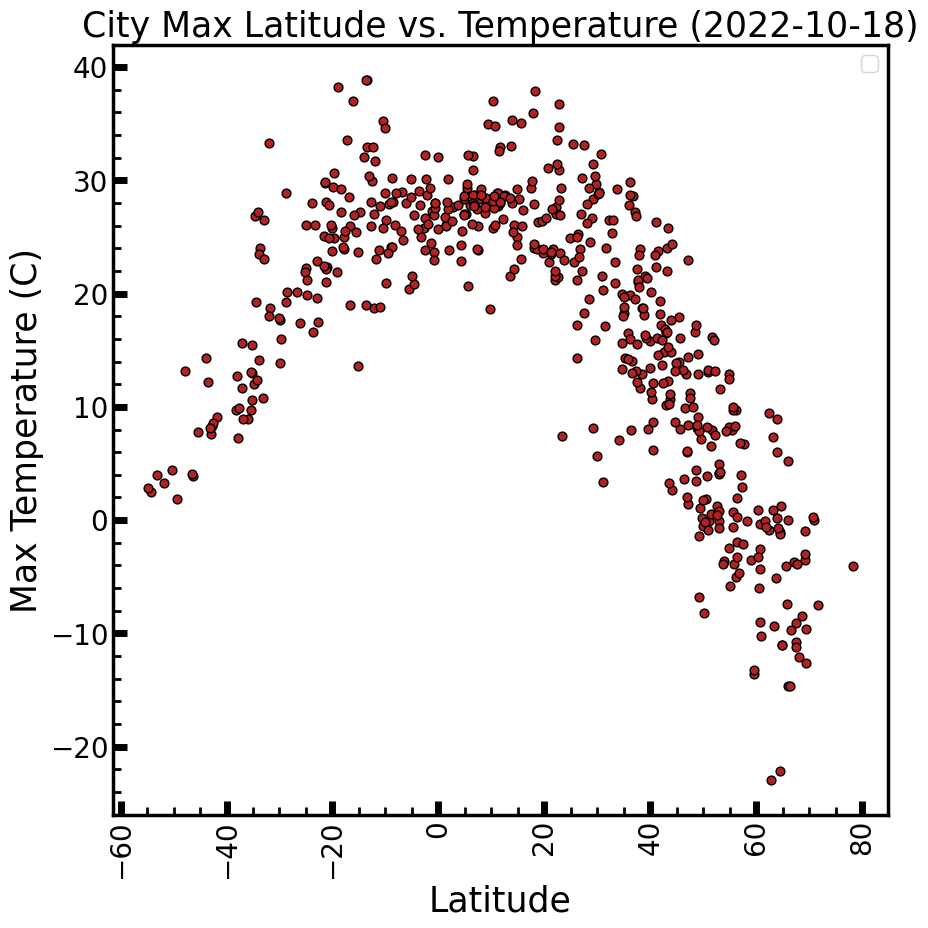

In [49]:
# Create a figure object
fig = plt.figure(figsize=(10,10))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Create the plot
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o', s=40, color='firebrick', edgecolor='k')
#plt.plot(city_data_df["Lat"], city_data_df["Max Temp"], marker='.', markersize=16, color='firebrick', linestyle="none")
plt.title('City Max Latitude vs. Temperature (2022-10-18)',fontsize=25)
plt.xlabel('Latitude', fontsize=25)
plt.ylabel('Max Temperature (C)', fontsize=25)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=5.0, direction='in', labelsize=20, labelcolor='k')
plt.tick_params(which='minor', length=6, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(37.5,46)
plt.xticks(rotation=90)

# Show the plot
plt.legend(loc="upper right", fontsize=15)
#plt.tight_layout()
plt.savefig("output/Fig1.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


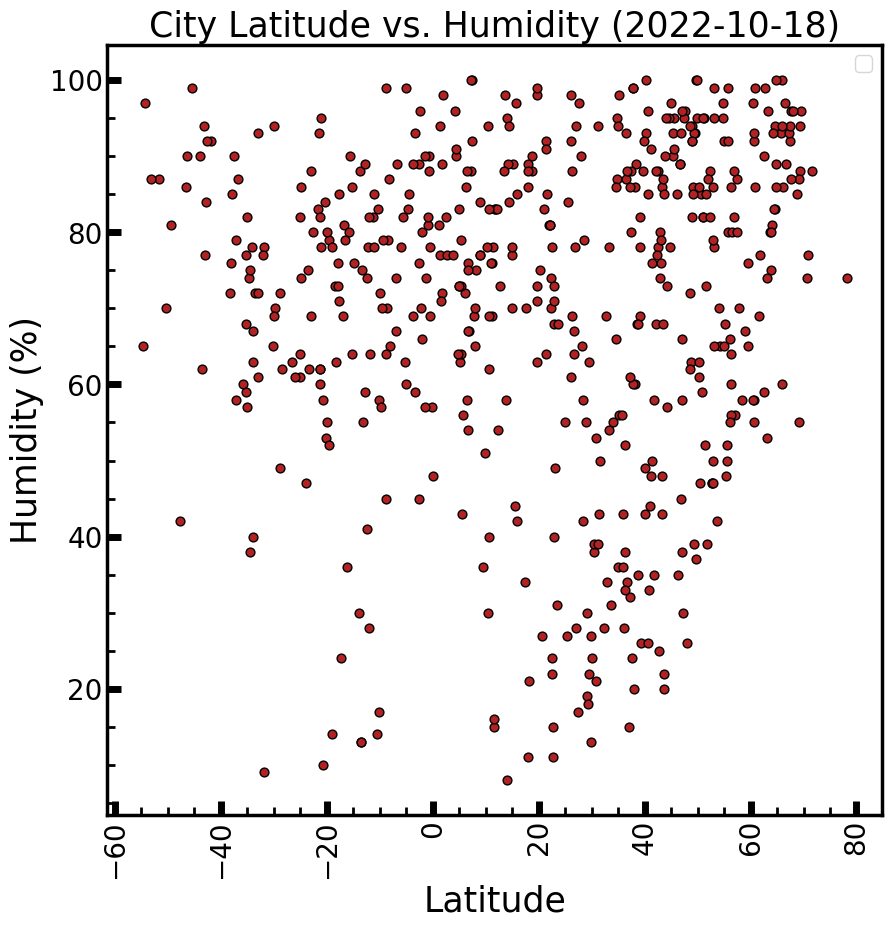

In [50]:
# Create a figure object
fig = plt.figure(figsize=(10,10))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Create the plot
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', s=40, color='firebrick', edgecolor='k')
#plt.plot(city_data_df["Lat"], city_data_df["Max Temp"], marker='.', markersize=16, color='firebrick', linestyle="none")
plt.title('City Latitude vs. Humidity (2022-10-18)',fontsize=25)
plt.xlabel('Latitude', fontsize=25)
plt.ylabel('Humidity (%)', fontsize=25)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=5.0, direction='in', labelsize=20, labelcolor='k')
plt.tick_params(which='minor', length=6, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(37.5,46)
plt.xticks(rotation=90)

# Show the plot
plt.legend(loc="upper right", fontsize=15)
#plt.tight_layout()
plt.savefig("output/Fig2.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


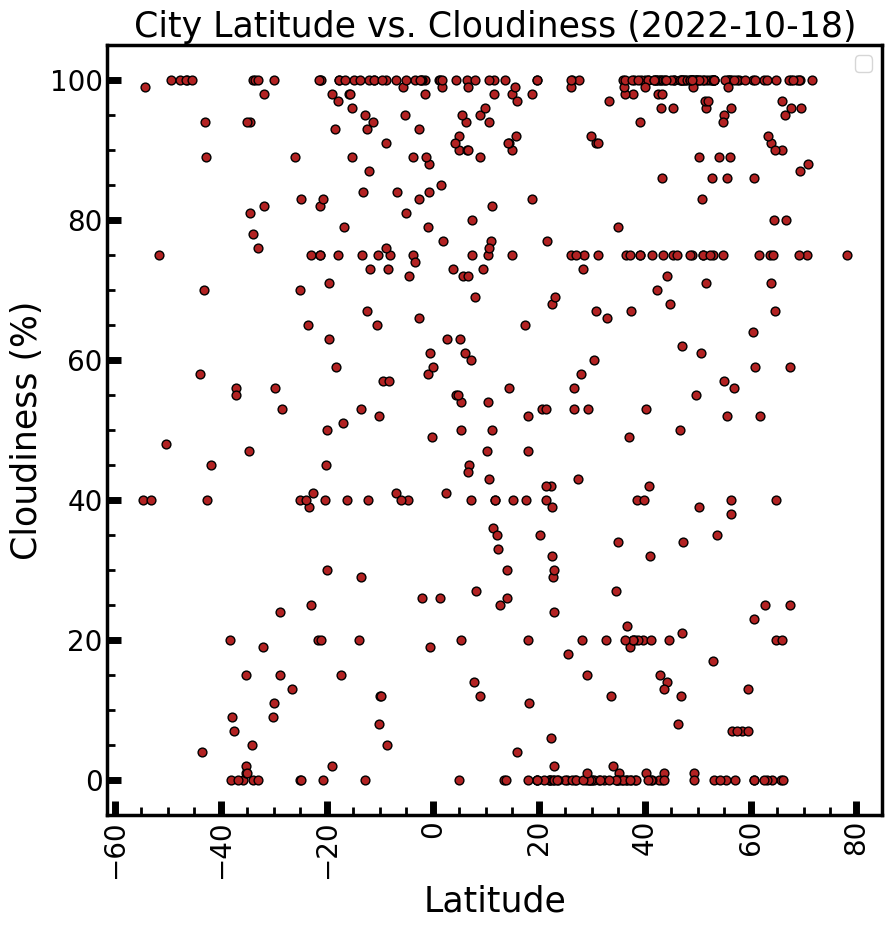

In [51]:
# Create a figure object
fig = plt.figure(figsize=(10,10))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Create the plot
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', s=40, color='firebrick', edgecolor='k')
#plt.plot(city_data_df["Lat"], city_data_df["Max Temp"], marker='.', markersize=16, color='firebrick', linestyle="none")
plt.title('City Latitude vs. Cloudiness (2022-10-18)',fontsize=25)
plt.xlabel('Latitude', fontsize=25)
plt.ylabel('Cloudiness (%)', fontsize=25)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=5.0, direction='in', labelsize=20, labelcolor='k')
plt.tick_params(which='minor', length=6, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(37.5,46)
plt.xticks(rotation=90)

# Show the plot
plt.legend(loc="upper right", fontsize=15)
#plt.tight_layout()
plt.savefig("output/Fig3.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


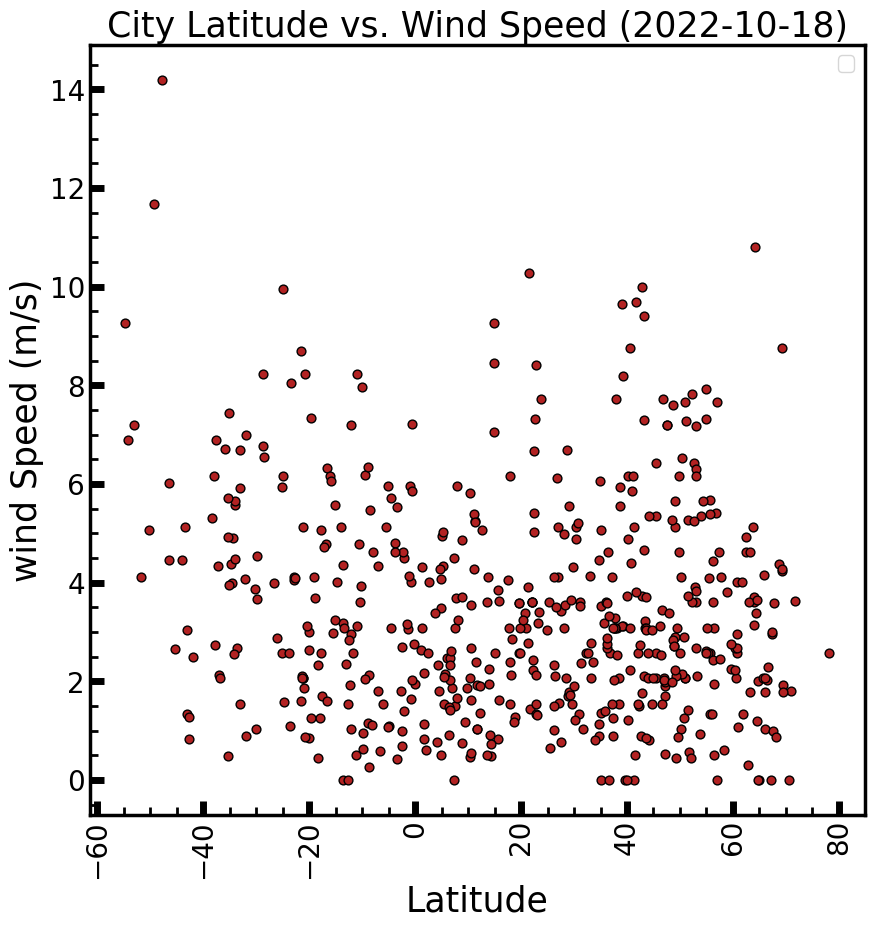

In [52]:
# Create a figure object
fig = plt.figure(figsize=(10,10))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

# Create the plot
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o', s=40, color='firebrick', edgecolor='k')
#plt.plot(city_data_df["Lat"], city_data_df["Max Temp"], marker='.', markersize=16, color='firebrick', linestyle="none")
plt.title('City Latitude vs. Wind Speed (2022-10-18)',fontsize=25)
plt.xlabel('Latitude', fontsize=25)
plt.ylabel('wind Speed (m/s)', fontsize=25)

plt.minorticks_on() 
plt.tick_params(which='major', length=10, width=5.0, direction='in', labelsize=20, labelcolor='k')
plt.tick_params(which='minor', length=6, width=2.0, direction='in')
#plt.ylim(-5,50)
#plt.xlim(37.5,46)
plt.xticks(rotation=90)

# Show the plot
plt.legend(loc="upper right", fontsize=15)
#plt.tight_layout()
plt.savefig("output/Fig4.png")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [107]:
from scipy.stats import linregress

# Define a function to create Linear Regression plots
def reg(dataframe, x, y, output):
    
    # Add the linear regression equation and line to plot
    x_values = dataframe[x]
    y_values = dataframe[y]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values                             = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    fig = plt.figure(figsize=(10,10))
    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams["axes.linewidth"] = 2.50
    plt.scatter(x_values,y_values, marker='o', s=40, color='firebrick', edgecolor='k')
    plt.plot(x_values,regress_values,"k-")
    plt.annotate(line_eq, (np.mean(x_values),np.mean(y_values)), fontsize=25, color="g")
    plt.xlabel(x, fontsize=25)
    plt.ylabel(y, fontsize=25)
    plt.minorticks_on() 
    plt.tick_params(which='major', length=10, width=5.0, direction='in', labelsize=20, labelcolor='k')
    plt.tick_params(which='minor', length=6, width=2.0, direction='in')
    print(f"The r-value is: {rvalue}")
    plt.savefig(f"Output/ {output}")
    plt.show()

In [108]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df['Lat'] > 0)]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hawaiian paradise park,19.5933,-154.9731,23.83,98,100,2.57,US,1698319429
3,thompson,55.7435,-97.8558,-3.91,80,100,2.57,CA,1698319419
5,yellowknife,62.4560,-114.3525,-0.88,90,100,4.92,CA,1698319792
7,cidade velha,14.9167,-23.6167,29.26,70,75,9.26,CV,1698319439
8,jamestown,42.0970,-79.2353,17.23,68,100,2.57,US,1698319439


In [109]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df['Lat'] < 0)]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,sechura,-5.5569,-80.8222,20.42,82,99,5.14,PE,1698319789
2,ariquemes,-9.9133,-63.0408,26.52,72,12,0.64,BR,1698319767
4,grytviken,-54.2811,-36.5092,2.48,97,99,6.90,GS,1698319791
6,adamstown,-25.0660,-130.1015,22.23,82,70,5.94,PN,1698319413
10,port lincoln,-34.7333,135.8667,12.04,74,47,4.38,AU,1698319449


###  Temperature vs. Latitude Linear Regression Plot


The r-value is: -0.8590820807577936


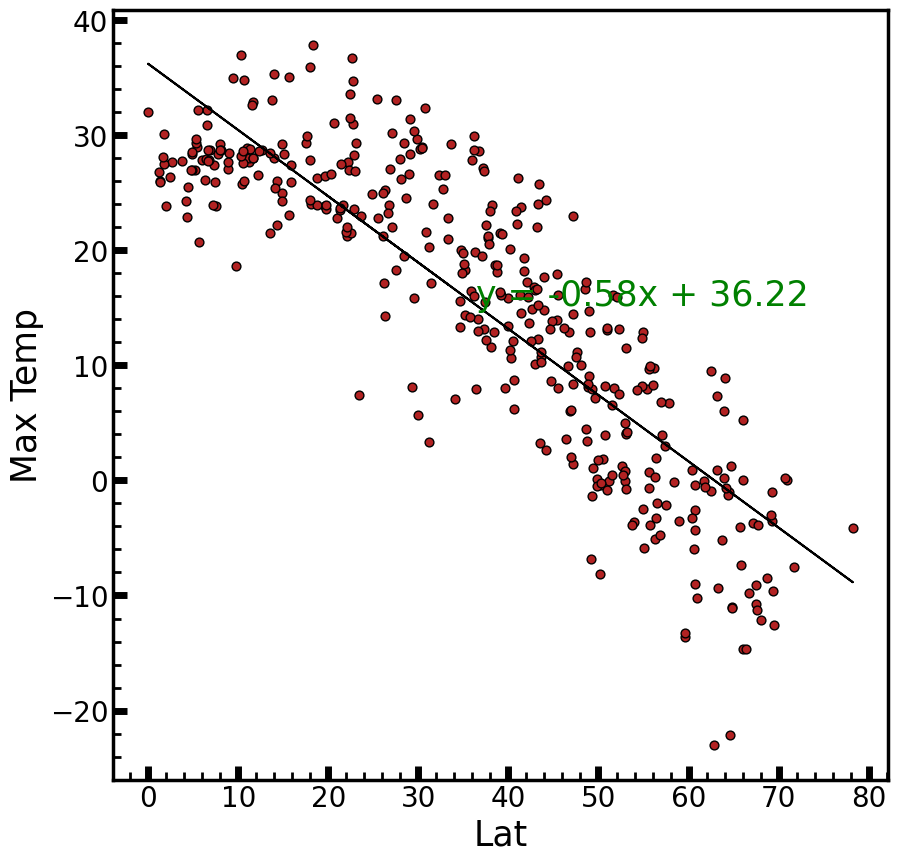

In [110]:
# Linear regression on Northern Hemisphere

reg(northern_hemi_df, "Lat", "Max Temp", "nMax")

The r-value is: 0.7667177777422438


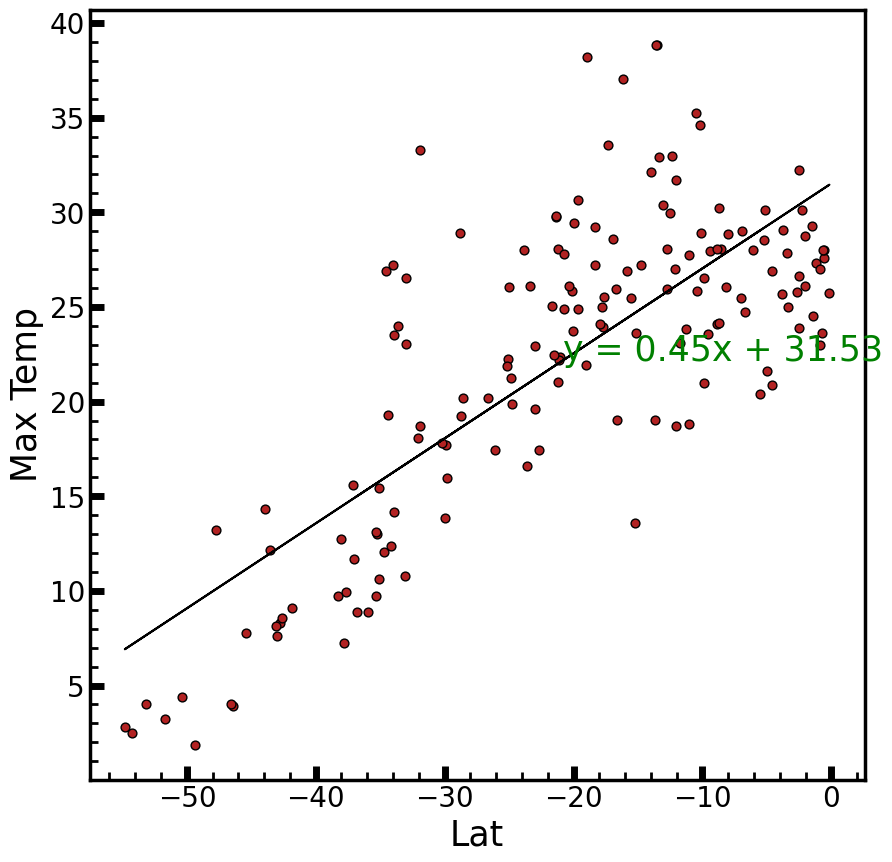

In [111]:
# Linear regression on Northern Hemisphere

reg(southern_hemi_df, "Lat", "Max Temp", "sMax")

**Discussion about the linear relationship:** For cities in northern hemispere as latitude increases maximum temerperature by city decreases. For southern hemispere as latitude decreases the maximum temperature of cities decreases. Basically as move close to either north or south pole maximum temerature decreases as poles sunlight received by sun decreases as one move away from equator towards poles.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.14937318014397566


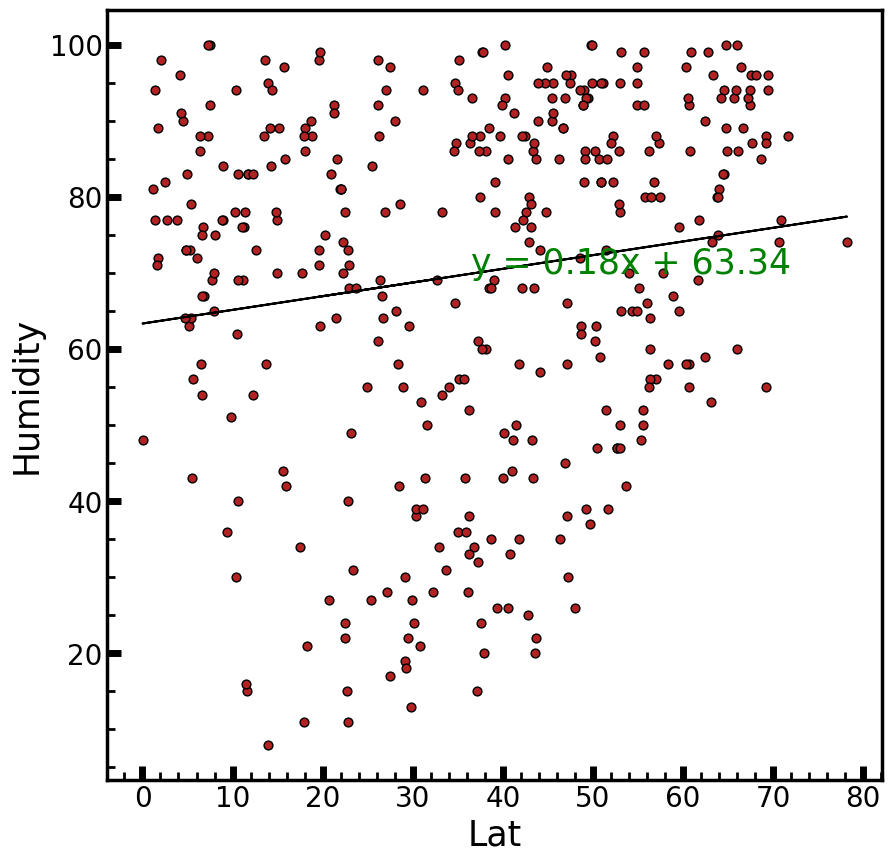

The r-value is: -0.07567440733230364


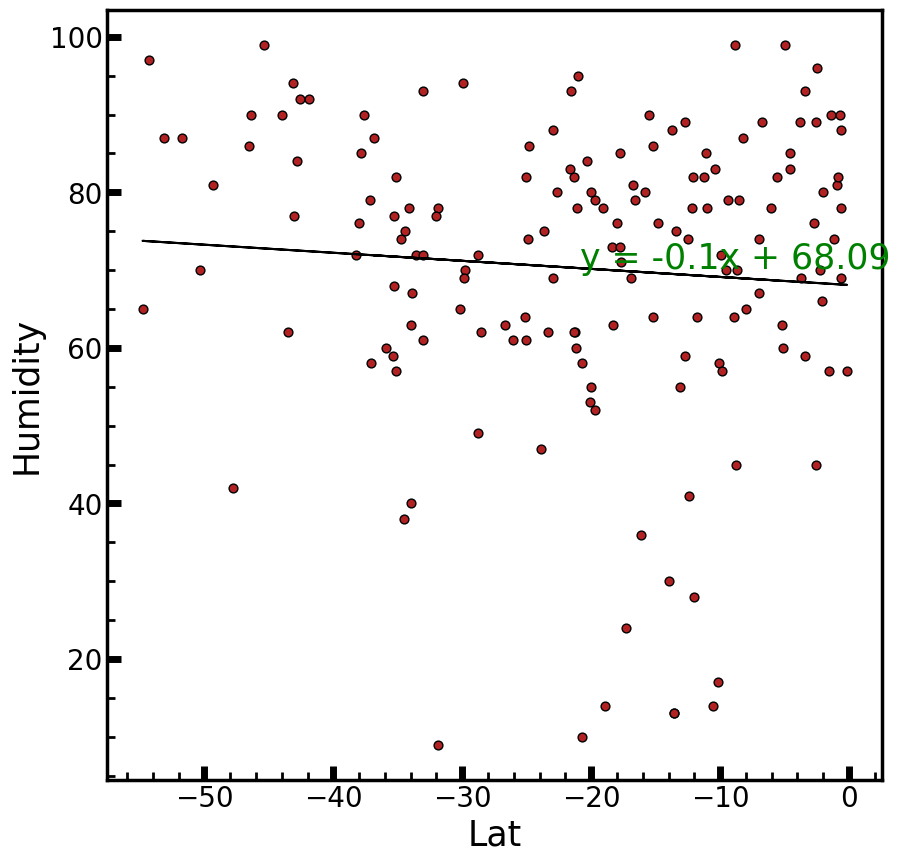

In [112]:
# Northern & Southern Hemisphere
reg(northern_hemi_df, "Lat", "Humidity", "nHum")
reg(southern_hemi_df, "Lat", "Humidity", "sHum")

**Discussion about the linear relationship:** The relation between Humidity and latitude is not tight and shows a significant scatter for both cities in northern and southen hemisphere. Hence conclusion cant be drawn. However with increase in latitude humidity increases for both hemisheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.13175665160732988


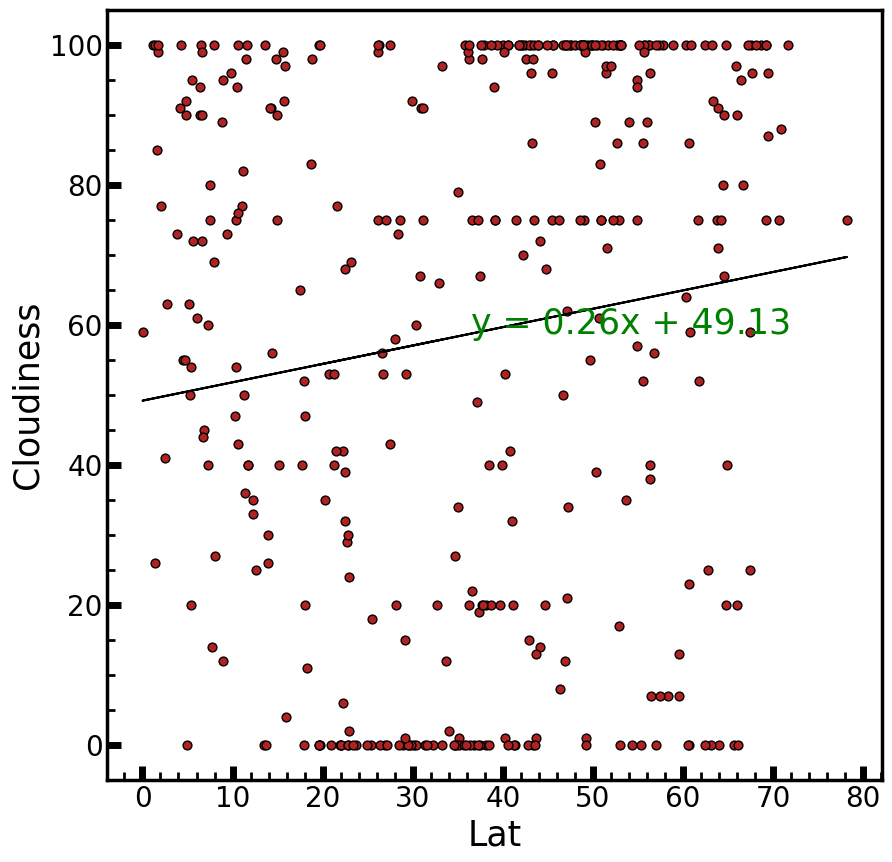

The r-value is: 0.21752779805896452


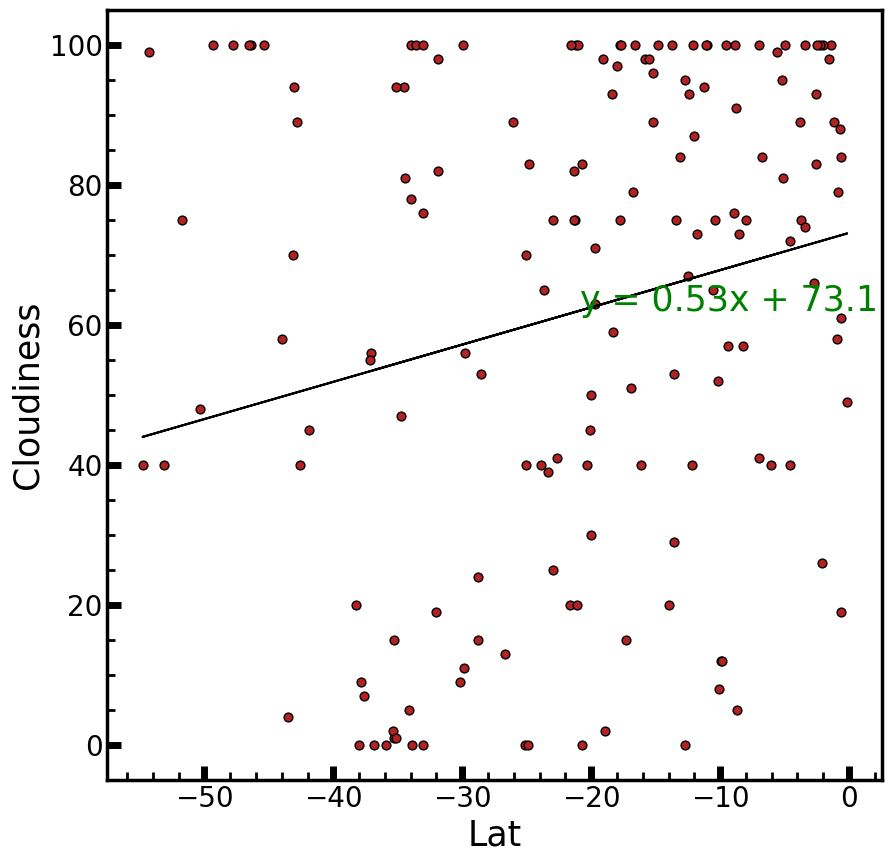

In [113]:
# Northern & Southern Hemisphere
reg(northern_hemi_df, "Lat", "Cloudiness", "nCloud")
reg(southern_hemi_df, "Lat", "Cloudiness", "sCloud")

**Discussion about the linear relationship:** The relation between Cloudiness and latitude is not tight and shows a significant scatter for both cities in northern and southen hemisphere. Hence conclusion cant be drawn. However with increase in latitude cloudiness increases for both hemisheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07246542983666707


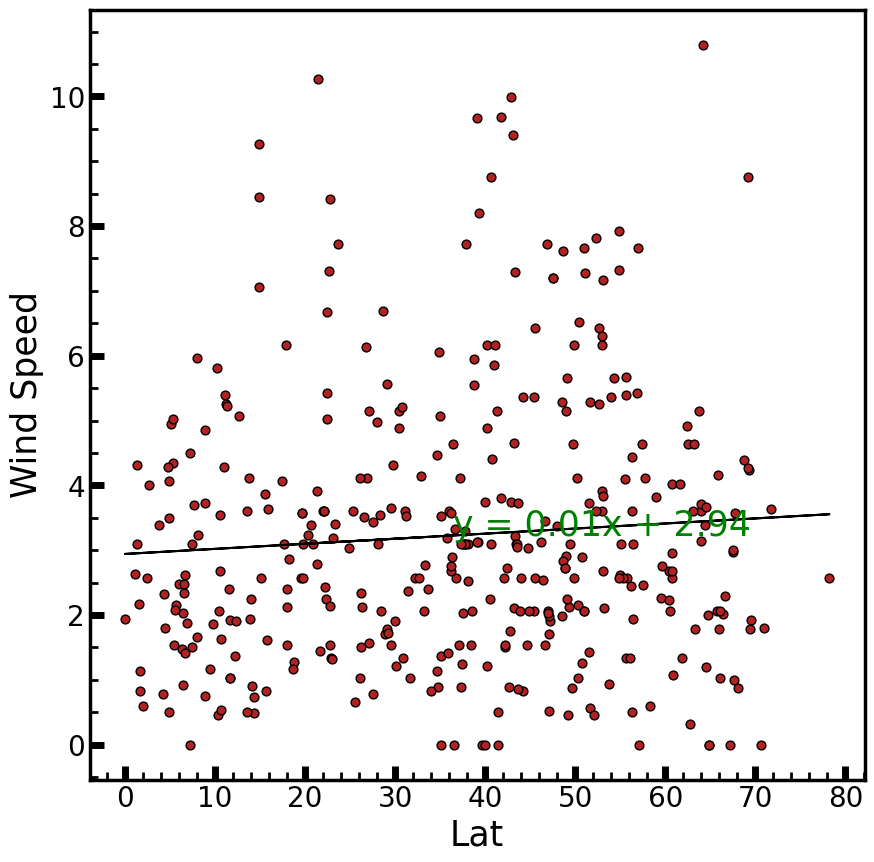

The r-value is: -0.2886810264921957


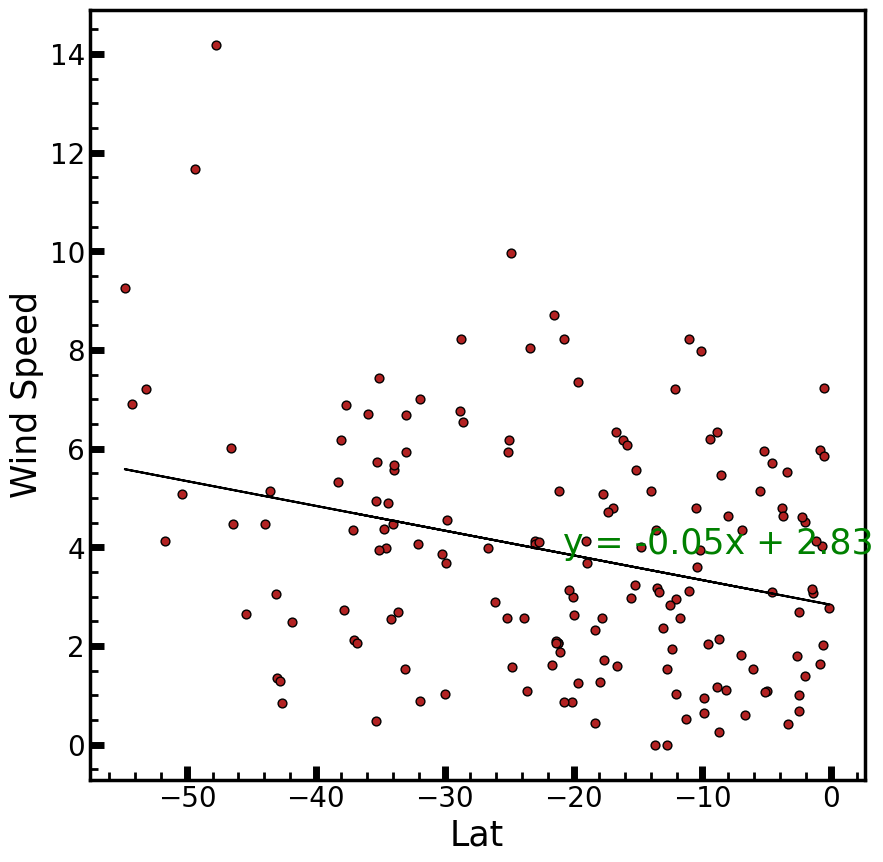

In [114]:
# Northern & Southern Hemisphere
reg(northern_hemi_df, "Lat", "Wind Speed", "nWind")
reg(southern_hemi_df, "Lat", "Wind Speed", "sWind")

**Discussion about the linear relationship:** The relation between Cloudiness and latitude is not tight and shows a significant scatter for both cities in northern and southen hemisphere. However we can say that wind speed is increases as we move away from equator. This effect is observed more for southern hemipsheres as most continets/landmass are in northern hemisphere. However southern hemisphere is more occupied with oceans hence allowing interupted flow of wind.